In [16]:
# import library
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from warpped.collection import parse_chronnectome, get_mean_chronnectome, get_number_of_visit, warp_knn
# import gloabl variables
from warpped.global_variables import * 

In [17]:
# The selected model should be contained in global_variables, if wanna try different parameter then uncomment bleow 
# K_state=12; rep_num = 2

hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k16_rep_2.mat'

In [18]:
hmm = loadmat(hmm_file)
hmm_info = loadmat(hmminfo_file)

In [19]:
# Parse HMM info
state_order = np.squeeze(hmm_info['ord']) # the order of state for fo_corr and ordered_p
fo_corr = pd.DataFrame(hmm_info['fo_matrix'], columns=state_order, index=state_order)
ordered_p = pd.DataFrame(hmm_info['ordered_p'], columns=state_order, index=state_order)

## hmms = hmm_info['hmms']  # contains the subject specific hmm
# Parse chronnectome info
## info based on veterbi path 
raw_fo, lifetime, intervals = parse_chronnectome(hmm_info[hmminfo_source], model_selection=False)


## Load Data

In [20]:
performance = pd.read_csv(f'{behav_dir}performance_proc.csv')
physio = pd.read_csv(f'{behav_dir}physio_proc.csv')
acti = pd.read_csv(f'{behav_dir}actigraph_proc.csv')
scales = pd.read_csv(f'{behav_dir}questionnaire_proc.csv')


In [21]:
fo_df =  pd.DataFrame(raw_fo, columns=[f'state{i}_fo' for i in range(1, K_state+1)])
lifetime_df = pd.DataFrame(get_mean_chronnectome(lifetime ), columns=[f'state{i}_life' for i in range(1, K_state+1)])
interval_df = pd.DataFrame(get_mean_chronnectome(intervals), columns=[f'state{i}_intervals' for i in range(1, K_state+1)])
visits_df = get_number_of_visit(lifetime)
visits_df.head()

,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits,state8_visits,state9_visits,state10_visits,state11_visits,state12_visits,state13_visits,state14_visits,state15_visits,state16_visits
0,6,3,13,4,10,9,7,6,2,6,6,10,9,5,3,3
1,9,9,9,8,6,3,1,6,5,7,2,3,7,6,6,8
2,10,5,20,10,9,10,1,4,2,10,10,5,1,4,8,6
3,7,3,14,6,2,3,1,9,4,9,15,5,8,7,8,2
4,12,8,11,10,16,6,0,5,1,10,5,3,5,6,7,2


In [22]:
chronnectome_df = pd.concat([fo_df,lifetime_df, interval_df, visits_df], axis=1).applymap(lambda x: round(float(x),2))
chronnectome_df

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state8_fo,state9_fo,state10_fo,...,state7_visits,state8_visits,state9_visits,state10_visits,state11_visits,state12_visits,state13_visits,state14_visits,state15_visits,state16_visits
0,0.05,0.03,0.12,0.03,0.12,0.12,0.09,0.06,0.02,0.05,...,7.0,6.0,2.0,6.0,6.0,10.0,9.0,5.0,3.0,3.0
1,0.10,0.12,0.06,0.10,0.06,0.03,0.00,0.08,0.07,0.06,...,1.0,6.0,5.0,7.0,2.0,3.0,7.0,6.0,6.0,8.0
2,0.08,0.04,0.11,0.10,0.08,0.08,0.01,0.03,0.03,0.10,...,1.0,4.0,2.0,10.0,10.0,5.0,1.0,4.0,8.0,6.0
3,0.08,0.04,0.12,0.06,0.02,0.03,0.01,0.08,0.02,0.08,...,1.0,9.0,4.0,9.0,15.0,5.0,8.0,7.0,8.0,2.0
4,0.12,0.09,0.07,0.11,0.14,0.05,0.00,0.03,0.01,0.10,...,0.0,5.0,1.0,10.0,5.0,3.0,5.0,6.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.10,0.06,0.16,0.07,0.09,0.03,0.00,0.02,0.06,0.08,...,0.0,3.0,7.0,7.0,7.0,9.0,3.0,6.0,5.0,5.0
107,0.07,0.08,0.11,0.11,0.11,0.08,0.00,0.04,0.08,0.09,...,1.0,4.0,6.0,7.0,4.0,3.0,0.0,1.0,6.0,7.0
108,0.11,0.02,0.10,0.07,0.11,0.05,0.10,0.04,0.01,0.06,...,8.0,6.0,2.0,4.0,5.0,3.0,7.0,5.0,6.0,6.0
109,0.09,0.06,0.12,0.05,0.04,0.06,0.00,0.00,0.05,0.16,...,0.0,1.0,6.0,12.0,2.0,5.0,4.0,6.0,7.0,7.0


<AxesSubplot:>

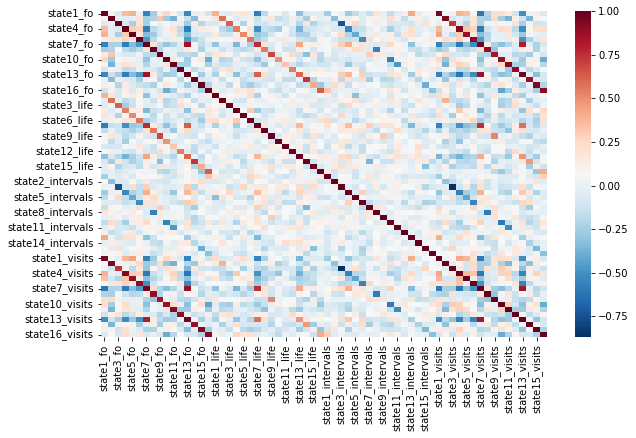

In [23]:
# FO matrix
plt.figure(figsize=(10,6))
sns.heatmap(chronnectome_df.corr(),cmap='RdBu_r')

## Label Encoding


In [24]:
# Chronotype Encoding
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(performance[['Type']])
chrono_array = oe_results.toarray()[:,0]
chrono_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
# Session Encoding 
# ... do this in a better way
ses_list = []
for ses in [0, 1, 2]:
    ses_list += [ses for i in range(37)]
ses_array = np.array(ses_list)
ses_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

## KNN classifier

In [26]:
# run PCA on FO Matrix, compress FO to 2D
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA(n_components=2)
chronnectome_df_reduced = pca.fit_transform(chronnectome_df)
dim1 = chronnectome_df_reduced[:,0]; dim2 = chronnectome_df_reduced[:,1]


In [27]:
cluster_df = pd.DataFrame([])
cluster_df['dim1'] = (dim1 - dim1.mean())/dim1.std()
cluster_df['dim2'] = (dim2 - dim2.mean())/dim2.std()
cluster_df['chro_type'] =  chrono_array 
cluster_df['time'] = ses_array
cluster_df

,dim1,dim2,chro_type,time
0,2.918873,0.654508,1.0,0
1,0.071772,-0.292962,1.0,0
2,3.714892,0.757117,1.0,0
3,-0.273256,-0.289392,1.0,0
4,-0.766330,0.736715,1.0,0
...,...,...,...,...
106,-0.194906,1.080028,0.0,2
107,0.175532,-0.056648,0.0,2
108,0.366878,0.613616,0.0,2
109,-0.278143,0.742102,0.0,2


In [28]:
X = cluster_df[['dim1', 'dim2']].values
n_neighbors = 3

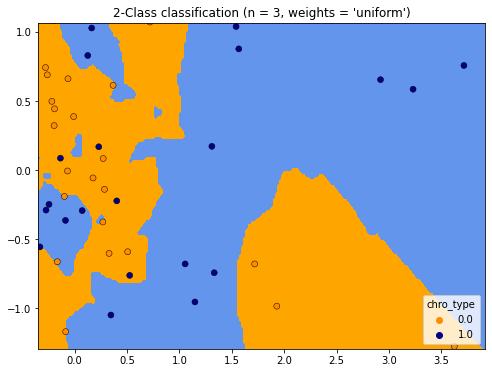

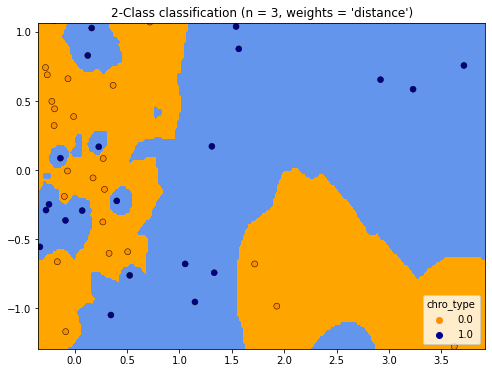

In [29]:
#KNN (N=3) Target=Chronotype
y = cluster_df.chro_type

# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

warp_knn(X,y,n_neighbors, cmap_light, cmap_bold)
# E type as 1, L as 0


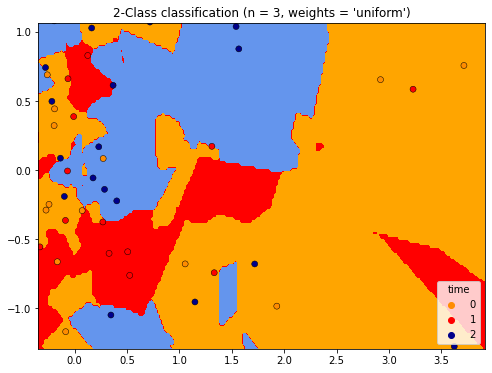

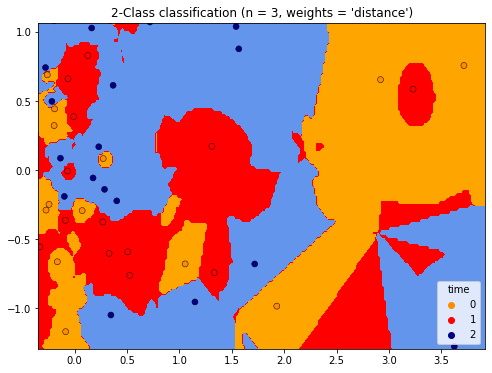

In [30]:
#KNN (N=3) Target=Time of day
y = cluster_df.time

from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(["orange","red", "cornflowerblue"])
cmap_bold = ["darkorange", "red","darkblue"]

warp_knn(X,y,n_neighbors, cmap_light, cmap_bold)
# 0 M ; 1 A; 2 E